In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [9]:
df = pd.read_csv("hitters_1/hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [10]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [12]:
df.shape

(263, 20)

In [20]:
ridge_model = Ridge(alpha = 5).fit(X_train, y_train)

In [21]:
ridge_model

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [22]:
ridge_model.coef_

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [23]:
ridge_model.intercept_

-3.4251968687146928

In [24]:
lambdalar = 10**np.linspace(10,-2,100)*0.5
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [25]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)

In [26]:
katsayilar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

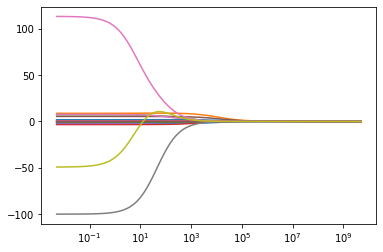

In [27]:
ax = plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")

In [31]:
ridge_model = Ridge().fit(X_train,y_train)

In [32]:
y_pred = ridge_model.predict(X_train)

In [34]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [35]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [37]:
#train hatası
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
rmse

289.34470696006565

In [38]:
#test hatası
y_pred = ridge_model.predict(X_test)

In [39]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

356.8082905730239

In [44]:
#model tuning
ridge_model = Ridge(1).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.8082905730239

In [46]:
np.random.randint(0,1000,100)

array([962, 634,  64, 339, 324, 612, 385, 153, 922, 240, 144,  57, 571,
       268, 302, 501,  84, 774, 437, 653, 405, 166, 113,  25, 527, 952,
       810, 793,  61, 996, 583, 312,  15, 522, 562, 140, 629,  36, 158,
       575, 836, 133, 628, 259, 193, 728, 305, 800,   4,  69, 334, 178,
       691, 570, 175, 191,  72, 875, 998, 969, 243, 588,   6, 878, 403,
        26, 869, 432, 310, 792, 155, 762, 714, 672, 125, 505, 550, 489,
       478, 360, 712, 213,  89,   9, 745,  59, 364,  92, 765, 740, 171,
       554, 177, 367, 498, 852, 957, 439, 227, 132])

In [47]:
lambdalar1 = np.random.randint(0,1000,100)

In [48]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [57]:
ridge_cv = RidgeCV(alphas = lambdalar1, scoring = "neg_mean_squared_error",cv= 10, normalize = True)

In [58]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([571, 661, 675, 725, 621, 406, 538, 609, 653, 208, 318, 870,  64,
       342, 668, 435, 892, 369, 440, 807, 332,   3, 632, 601,  31, 685,
       258, 674, 311, 985, 894, 113, 223, 243, 808, 553, 994, 186, 178,
       827, 848, 192, 363, 375, 359, 264, 656, 934, 134, 457,  17, 632,
       248, 476, 900, 208, 816, 816,  96, 143, 561, 699, 963, 844, 630,
       390, 192, 939, 442,  72, 191, 615, 921, 523, 439, 235, 879, 645,
       337,  49, 942, 923, 238, 185, 244, 549, 663, 296, 785, 784, 964,
       736, 459, 196, 125, 896, 645, 197, 615, 160]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [59]:
ridge_cv.alpha_

3

In [60]:
#final modeli
ridge_tuned = Ridge(alpha = ridge_cv.alpha_).fit(X_train, y_train)

In [61]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.52937362973626